In [1]:
import json
import requests
import numpy as np
import pandas as pd
import datetime as dt
import os
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import STL
from sklearn.model_selection import train_test_split
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing
import itertools

In [2]:
sns.set(style='darkgrid')

In [3]:
api_key = "CDE27277-87DA-4A9B-9C24-6BEDCE2FA1B3"

url = "https://rest.coinapi.io/v1/ohlcv/LTC/GBP/history?period_id=1DAY&time_start=2015-01-01T00:00:00&time_end=2020-10-31T23:59:00&limit=100000"
headers = {"X-CoinAPI-Key" : api_key}
response = requests.get(url, headers = headers)

if(response.status_code == 429):
    # API response
    print("Too many requests.")

In [4]:
coin_data  = json.loads(response.text)

In [5]:
ltc_data = pd.DataFrame(coin_data)

In [7]:
ltc_data.rename(columns = {
    "time_period_start": "Start Time",
    "time_period_end": "End Time",
    "time_open": "Open Time",
    "time_close": "Close Time",
    "price_open": "Price Open",
    "price_high": "Price High",
    "price_low": "Price Low",
    "price_close": "Price Close",
    "volume_traded": "Volume Traded",
    "trades_count": "Trade Count",
}, inplace = True)

In [9]:
ltc_data.drop(["End Time", "Open Time", "Close Time"], axis = "columns", inplace = True)

In [10]:
reorder_columns = [
    'Start Time',
    'Price Open',
    'Price Close',
    'Price High',
    'Price Low',
    'Volume Traded',
    'Trade Count'
]

In [11]:
ltc_data = ltc_data.reindex(columns = reorder_columns)

In [12]:
ltc_data["Start Time"] = pd.to_datetime(ltc_data["Start Time"])

In [13]:
ltc_data["Day of the Week"] = ltc_data['Start Time'].dt.dayofweek

In [14]:
def number_to_day(number):
    days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    return days[number]

In [15]:
ltc_data["Day of the Week"] = ltc_data["Day of the Week"].apply(number_to_day)

In [17]:
os.makedirs('Data', exist_ok=True)
ltc_data.to_csv("Data/LTC Day History.csv", index = False)

In [18]:
df = pd.read_csv("Data/LTC Day History.csv")

In [19]:
df.describe()

,Price Open,Price Close,Price High,Price Low,Volume Traded,Trade Count
count,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000
mean,45.949883,45.953902,47.607813,44.153896,8633.012643,1273.508906
std,18.222904,18.215584,18.937128,17.386577,7934.583831,1567.910404
min,18.290000,18.250000,18.810000,17.580000,52.815566,6.000000
25%,34.595000,34.615000,35.512500,33.585000,3689.772671,619.000000
50%,41.340000,41.250000,42.865000,39.990000,6240.665215,921.000000
75%,52.432500,52.495000,54.885000,50.237500,10882.170322,1367.000000
max,110.780000,111.230000,117.490000,108.000000,89400.581015,25253.000000


In [20]:
df["Price High"].describe()

count    786.000000
mean      47.607813
std       18.937128
min       18.810000
25%       35.512500
50%       42.865000
75%       54.885000
max      117.490000
Name: Price High, dtype: float64

In [22]:
df.head()

,Start Time,Price Open,Price Close,Price High,Price Low,Volume Traded,Trade Count,Day of the Week
0,2018-09-07 00:00:00+00:00,43.92,43.57,43.99,43.20,52.815566,6,Friday
1,2018-09-08 00:00:00+00:00,45.00,44.99,47.68,41.39,128.977278,59,Saturday
2,2018-09-09 00:00:00+00:00,42.90,43.00,45.66,42.14,665.177997,116,Sunday
3,2018-09-10 00:00:00+00:00,43.98,41.10,43.99,40.88,124.579592,64,Monday
4,2018-09-11 00:00:00+00:00,41.48,39.87,41.67,39.00,462.016320,71,Tuesday


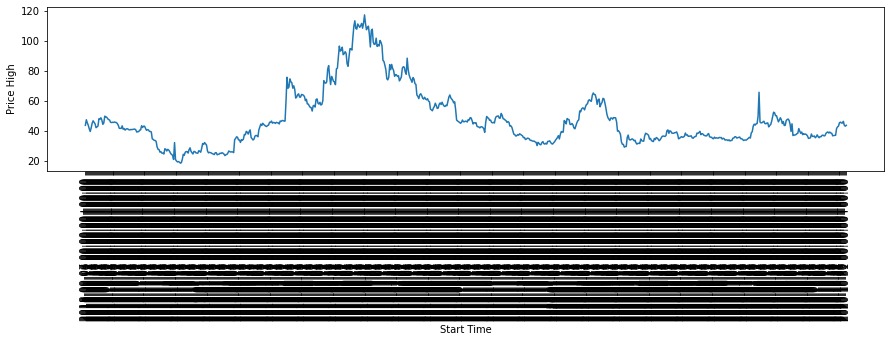

In [26]:
plt.figure(figsize=(15,3))
sns.lineplot(data=df, x='Start Time', y='Price High')
plt.xticks(rotation=90)

plt.show()

# Do a similar thing with ETH vs. EUR

## ETH Data daily

In [65]:
100000 / 24

4166.666666666667

In [71]:
pd.to_datetime(dt.date.today()) - pd.to_timedelta(4166, unit='D')

Timestamp('2010-02-11 00:00:00')

In [63]:
dir(dt.date.today())

['__add__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 'ctime',
 'day',
 'fromisocalendar',
 'fromisoformat',
 'fromordinal',
 'fromtimestamp',
 'isocalendar',
 'isoformat',
 'isoweekday',
 'max',
 'min',
 'month',
 'replace',
 'resolution',
 'strftime',
 'timetuple',
 'today',
 'toordinal',
 'weekday',
 'year']

In [66]:
url = 'https://rest.coinapi.io/v1/exchangerate/ETH/EUR/history?period_id=1HRS&time_start=2016-01-01T00:00:00&time_end=2021-07-01T00:00:00&limit=100000'
headers = {'X-CoinAPI-Key' : api_key}
response = requests.get(url, headers=headers)

In [67]:
eth_data  = json.loads(response.text)

In [68]:
eth_data = pd.DataFrame(eth_data)

In [69]:
eth_data

,time_period_start,time_period_end,time_open,time_close,rate_open,rate_high,rate_low,rate_close
0,2016-01-01T00:00:00.0000000Z,2016-01-02T00:00:00.0000000Z,2016-01-01T06:10:00.0000000Z,2016-01-01T23:59:00.0000000Z,0.891758,0.915913,0.834592,0.875048
1,2016-01-02T00:00:00.0000000Z,2016-01-03T00:00:00.0000000Z,2016-01-02T00:00:00.0000000Z,2016-01-02T00:00:00.0000000Z,0.875986,0.904742,0.861439,0.874035
2,2016-01-03T00:00:00.0000000Z,2016-01-04T00:00:00.0000000Z,2016-01-03T00:00:00.0000000Z,2016-01-03T00:00:00.0000000Z,0.875076,0.903713,0.870055,0.873491
3,2016-01-04T00:00:00.0000000Z,2016-01-05T00:00:00.0000000Z,2016-01-04T00:00:00.0000000Z,2016-01-04T00:00:00.0000000Z,0.874000,0.902119,0.868635,0.879264
4,2016-01-05T00:00:00.0000000Z,2016-01-06T00:00:00.0000000Z,2016-01-05T20:42:00.0000000Z,2016-01-05T23:59:00.0000000Z,0.881957,0.917123,0.866040,0.876195
...,...,...,...,...,...,...,...,...
2003,2021-06-26T00:00:00.0000000Z,2021-06-27T00:00:00.0000000Z,2021-06-26T00:00:00.0000000Z,2021-06-26T23:59:00.0000000Z,1518.983163,1560.962009,1439.590934,1534.355268
2004,2021-06-27T00:00:00.0000000Z,2021-06-28T00:00:00.0000000Z,2021-06-27T00:00:00.0000000Z,2021-06-27T23:59:00.0000000Z,1535.680038,1669.372300,1511.100866,1657.174974
2005,2021-06-28T00:00:00.0000000Z,2021-06-29T00:00:00.0000000Z,2021-06-28T00:00:00.0000000Z,2021-06-28T23:59:00.0000000Z,1661.600864,1803.932244,1640.965855,1744.771458
2006,2021-06-29T00:00:00.0000000Z,2021-06-30T00:00:00.0000000Z,2021-06-29T00:00:00.0000000Z,2021-06-29T23:58:00.0000000Z,1746.262268,1887.411946,1737.911563,1819.644981


In [72]:
os.makedirs('Data', exist_ok=True)
eth_data.to_csv("Data/ETH Day History.csv", index = False)

## ETH Data hourly

In [73]:
api_key = "CDE27277-87DA-4A9B-9C24-6BEDCE2FA1B3"
cryptos = ['BHC', 'BTC', 'ETH', 'LTC']
url = 'https://rest.coinapi.io/v1/exchangerate/ETH/EUR/history?period_id=1HRS&time_start=2016-01-01T00:00:00&time_end=2021-07-01T00:00:00&limit=100000'
headers = {'X-CoinAPI-Key' : api_key}
response = requests.get(url, headers=headers)

In [74]:
eth_data  = json.loads(response.text)

In [75]:
eth_data = pd.DataFrame(eth_data)

In [76]:
eth_data

,time_period_start,time_period_end,time_open,time_close,rate_open,rate_high,rate_low,rate_close
0,2016-01-01T00:00:00.0000000Z,2016-01-01T01:00:00.0000000Z,2016-01-01T00:00:00.0000000Z,2016-01-01T00:00:00.0000000Z,0.898998,0.914023,0.882810,0.884674
1,2016-01-01T01:00:00.0000000Z,2016-01-01T02:00:00.0000000Z,2016-01-01T01:00:00.0000000Z,2016-01-01T01:00:00.0000000Z,0.884696,0.897846,0.883956,0.886108
2,2016-01-01T02:00:00.0000000Z,2016-01-01T03:00:00.0000000Z,2016-01-01T02:00:00.0000000Z,2016-01-01T02:00:00.0000000Z,0.886098,0.912861,0.884054,0.884683
3,2016-01-01T03:00:00.0000000Z,2016-01-01T04:00:00.0000000Z,2016-01-01T03:00:00.0000000Z,2016-01-01T03:00:00.0000000Z,0.885067,0.887479,0.883260,0.884667
4,2016-01-01T04:00:00.0000000Z,2016-01-01T05:00:00.0000000Z,2016-01-01T04:00:00.0000000Z,2016-01-01T04:00:00.0000000Z,0.884428,0.887992,0.884155,0.885740
...,...,...,...,...,...,...,...,...
48187,2021-06-30T19:00:00.0000000Z,2021-06-30T20:00:00.0000000Z,2021-06-30T19:02:00.0000000Z,2021-06-30T19:46:00.0000000Z,1868.635996,1889.386506,1857.126590,1884.648911
48188,2021-06-30T20:00:00.0000000Z,2021-06-30T21:00:00.0000000Z,2021-06-30T20:00:00.0000000Z,2021-06-30T20:56:00.0000000Z,1892.659554,1925.634577,1887.856673,1889.538779
48189,2021-06-30T21:00:00.0000000Z,2021-06-30T22:00:00.0000000Z,2021-06-30T21:02:00.0000000Z,2021-06-30T21:52:00.0000000Z,1893.114717,1924.550929,1892.263227,1908.293063
48190,2021-06-30T22:00:00.0000000Z,2021-06-30T23:00:00.0000000Z,2021-06-30T22:02:00.0000000Z,2021-06-30T22:56:00.0000000Z,1906.444026,1907.073090,1895.838440,1900.302369


In [77]:
os.makedirs('Data', exist_ok=True)
eth_data.to_csv("Data/ETH Hour History.csv", index = False)

# Time series analysis

In [194]:
df = pd.read_csv("Data/ETH Day History.csv")

In [195]:
df = df.drop(['time_period_end', 'time_open', 'time_close'], axis=1)

In [196]:
df = df.drop(['time_period_end', 'time_open', 'time_close'], axis=1)
df['time_period_start'] = df['time_period_start'].astype('datetime64[D]')

In [197]:
df = df.set_index('time_period_start')

In [198]:
df.index.freq = 'D'

In [199]:
df['avg_rate'] = (df['rate_open'] + df['rate_close'])/2

<AxesSubplot:xlabel='time_period_start', ylabel='avg_rate'>

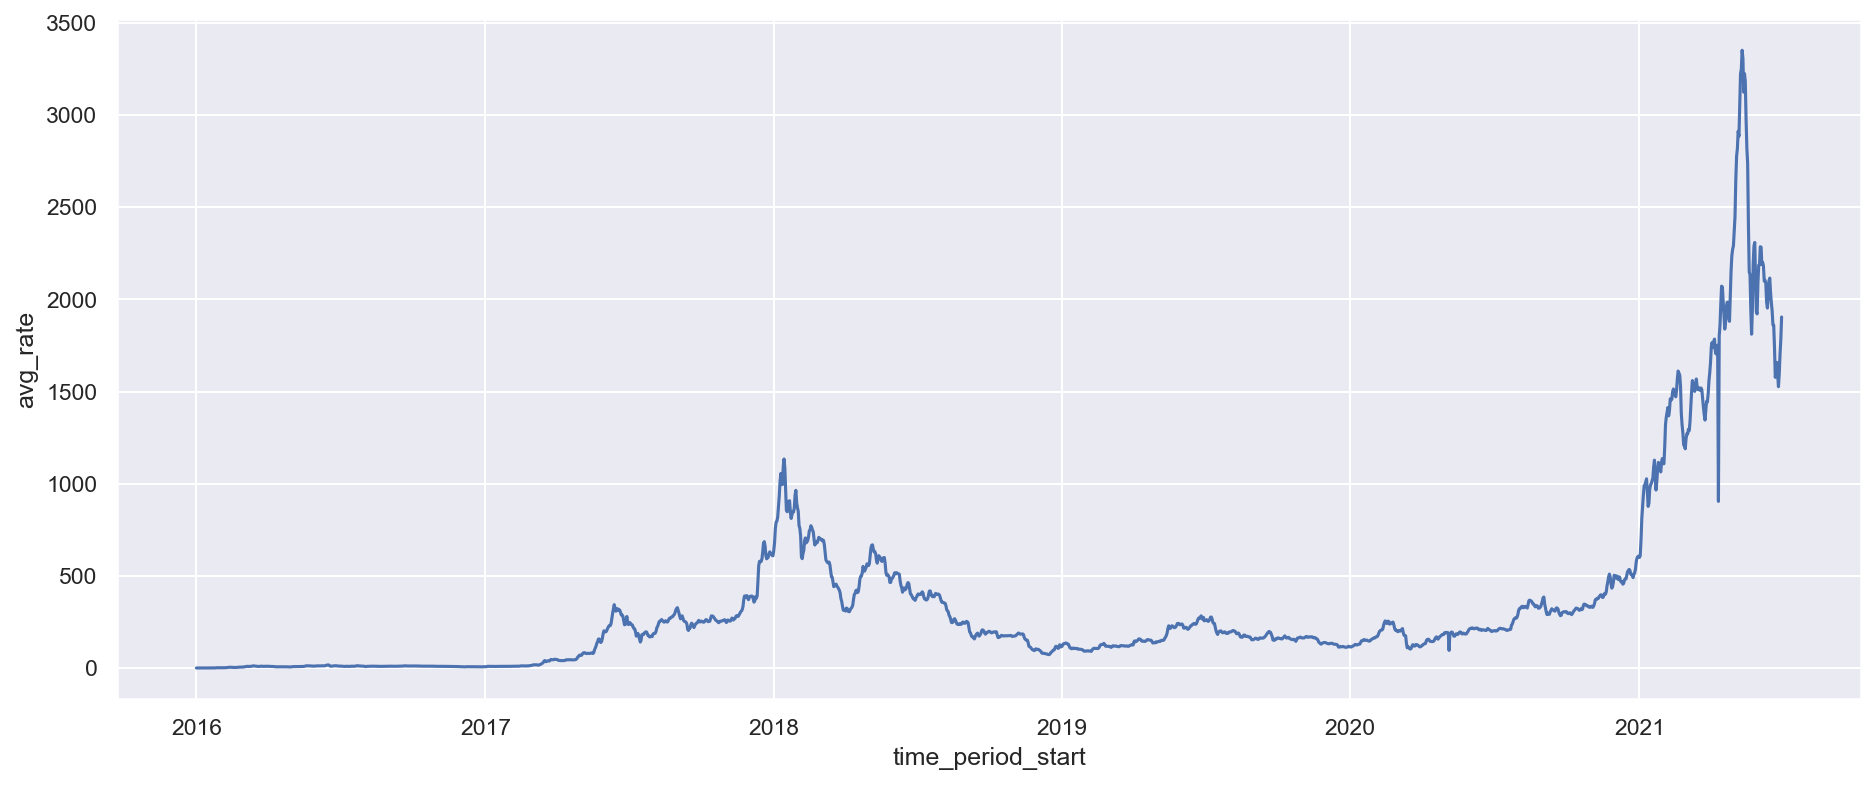

In [200]:
plt.figure(figsize=(15,6), dpi=150)
sns.lineplot(data=df, x=df.index, y='avg_rate')

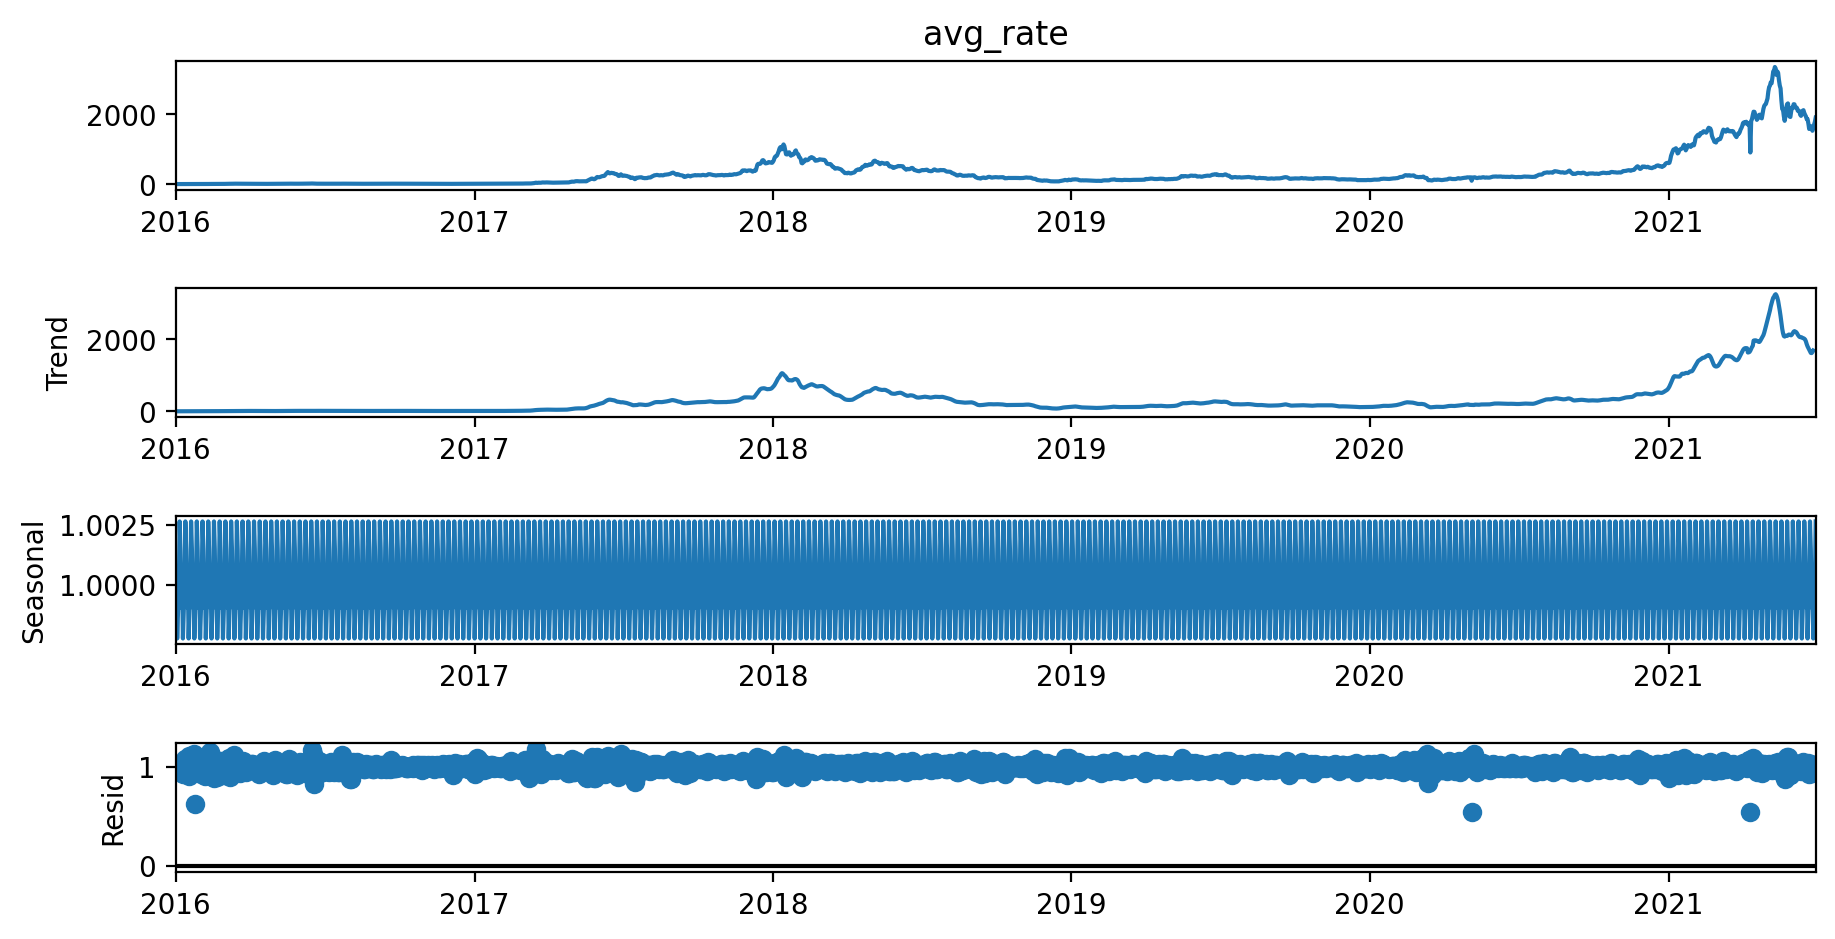

In [147]:
from statsmodels.tsa.seasonal import seasonal_decompose

res = seasonal_decompose(df['avg_rate'], model='multiplicative')
fig = res.plot()
fig.set_size_inches(10,5)
fig.set_dpi(200)

In [148]:
df = df[df.index > '2020-01-01']

<AxesSubplot:xlabel='time_period_start', ylabel='avg_rate'>

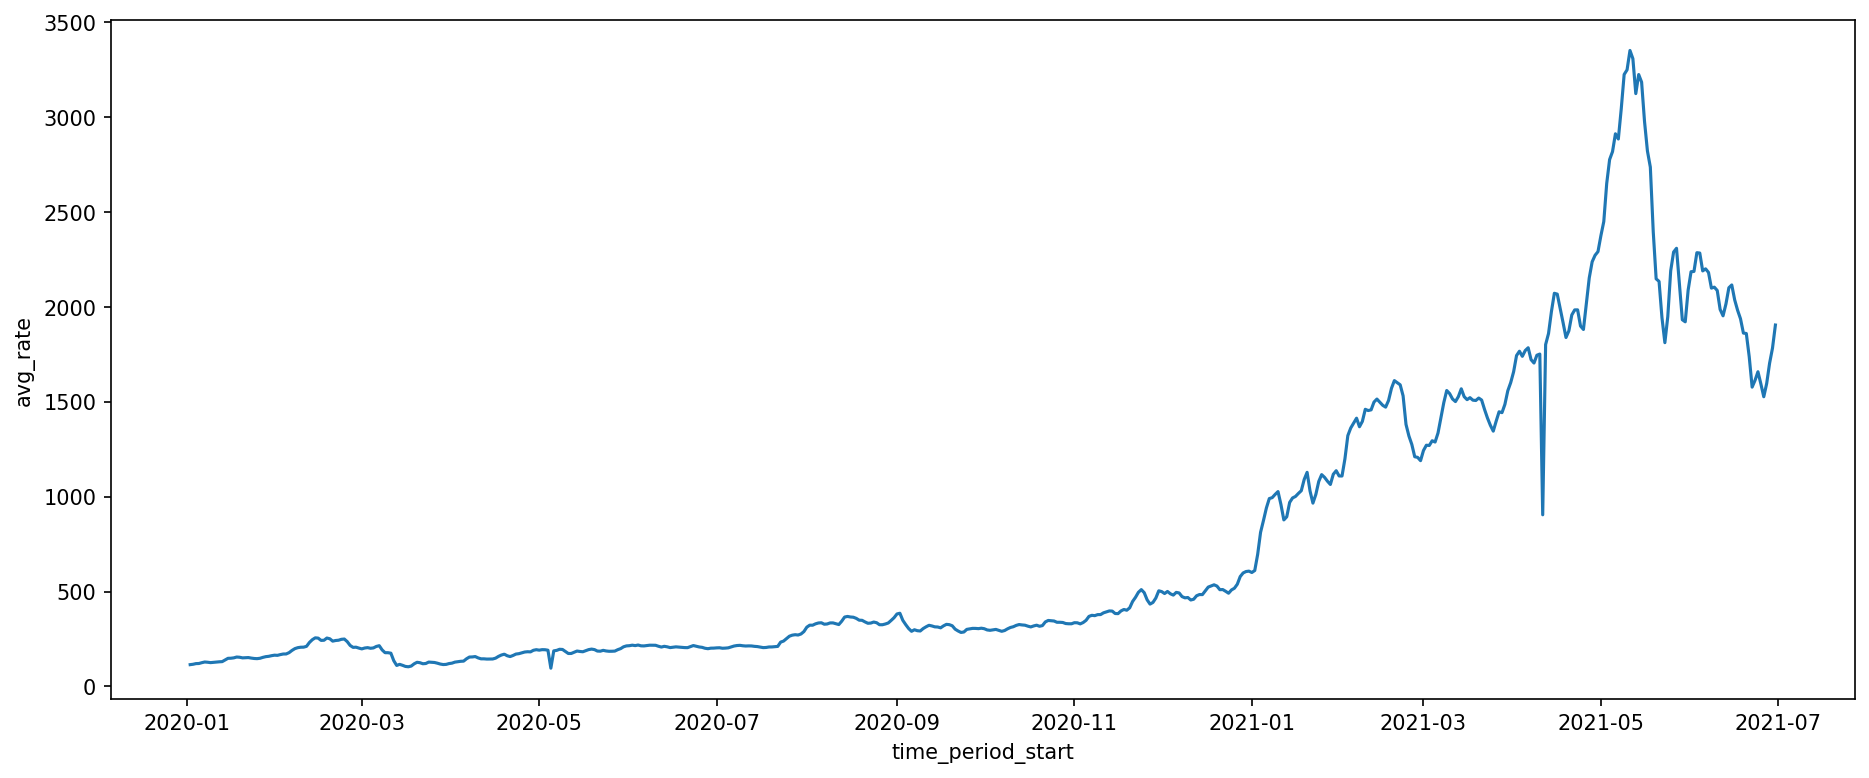

In [149]:
plt.figure(figsize=(15,6), dpi=150)
sns.lineplot(data=df, x=df.index, y='avg_rate')

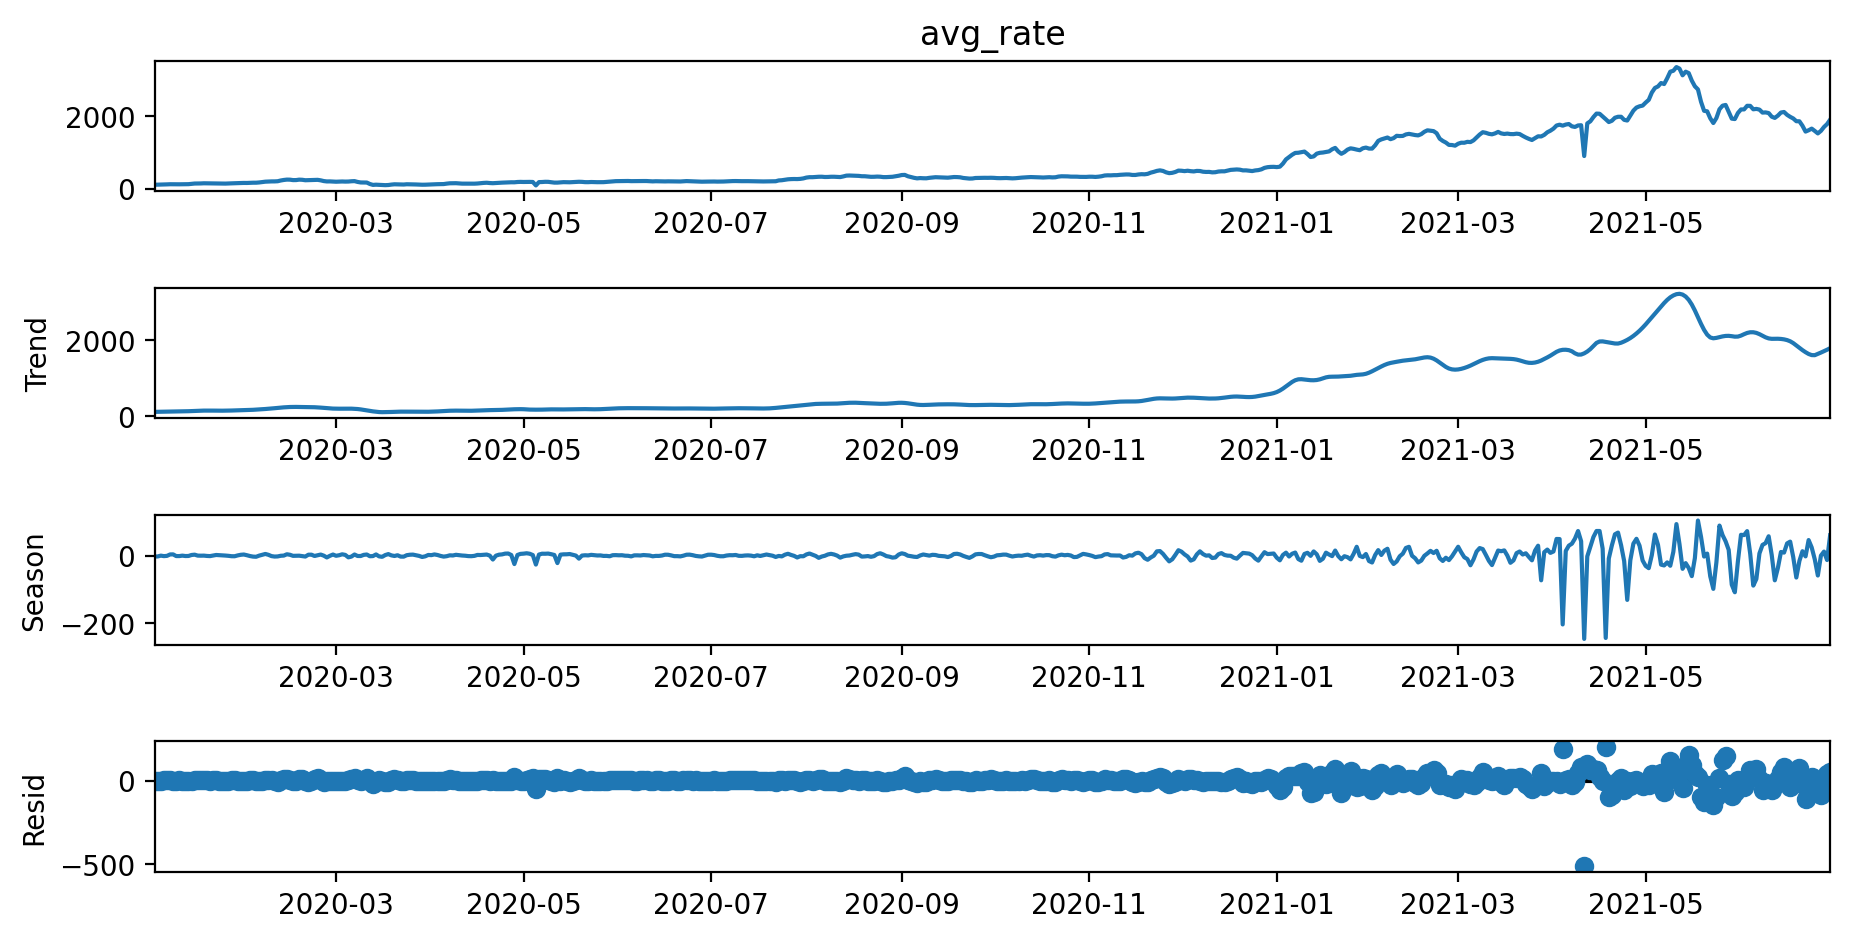

In [150]:
res = STL(df['avg_rate']).fit()
fig = res.plot()
fig.set_size_inches(10,5)
fig.set_dpi(200)
plt.show()

In [152]:
def get_stationarity(df, var_to_predict, window) :
    rolling_mean = df.rolling(window=window).mean()
    rolling_std = df.rolling(window=window).std()
    
    plt.figure(figsize=(15,5), dpi=150)
    original = sns.lineplot(data=df, x=df.index, y=var_to_predict, lw=3, label='Original')
    mean = sns.lineplot(data=rolling_mean, x=rolling_mean.index, y=var_to_predict, lw=3, label='Rolling Average')
    std = sns.lineplot(data=rolling_std, x=rolling_std.index, y=var_to_predict, lw=3, label='Rolling Std')
    plt.title('Rolling mean & Standard deviation')
    plt.show()
    
    # Dickey-Fuller test
    result = adfuller(df[var_to_predict])
    print('Test statistic = {:.3f}'.format(result[0]))
    print('P-value = {:.3f}'.format(result[1]))
    print('Critical values :')
    for k, v in result[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<result[0] else '', 100-int(k[:-1])))

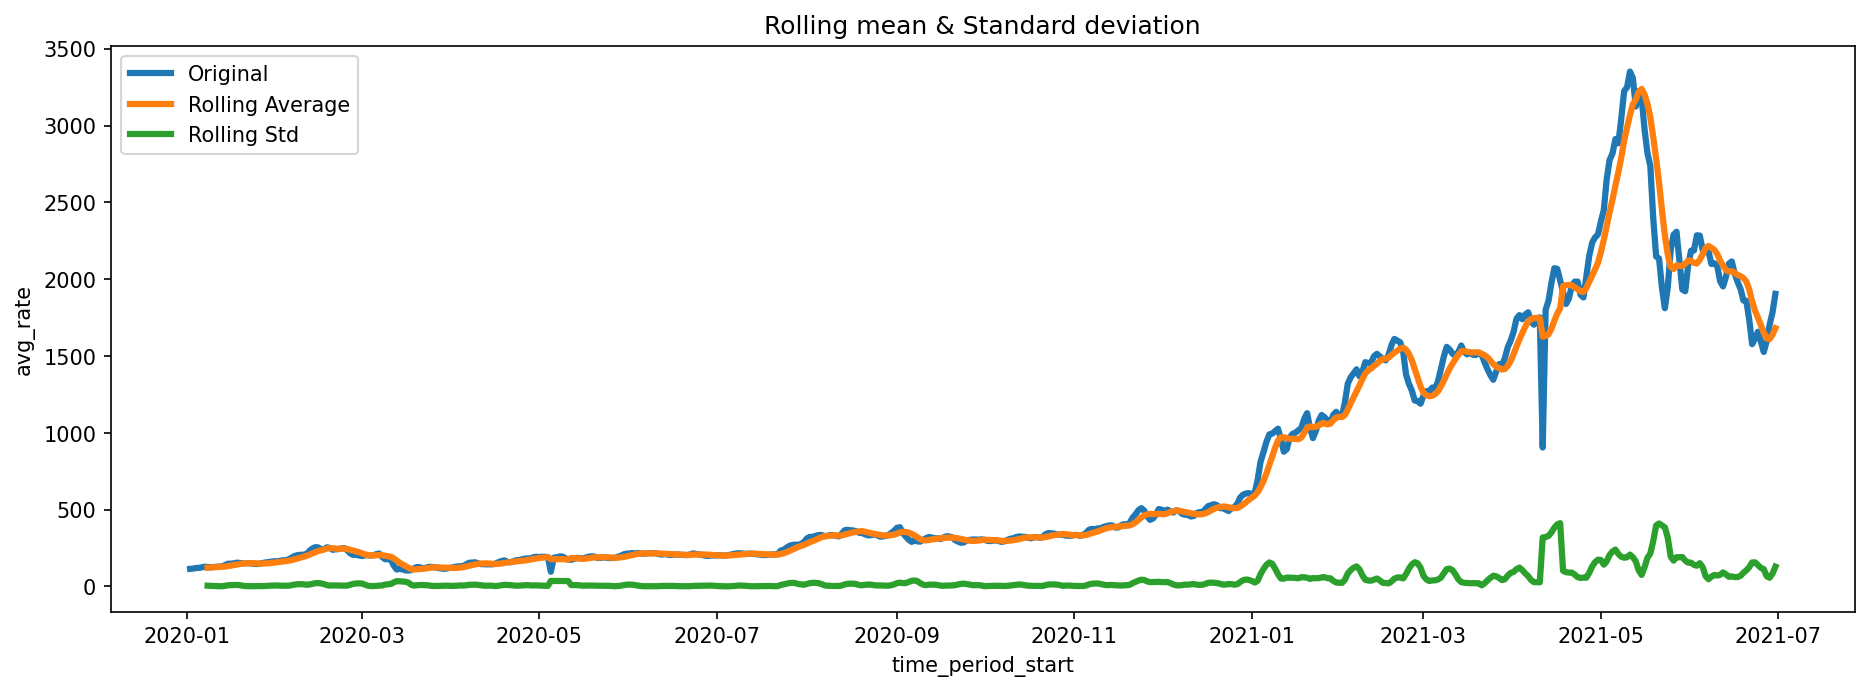

Test statistic = -0.712
P-value = 0.844
Critical values :
	1%: -3.442405720052601 - The data is not stationary with 99% confidence
	5%: -2.866857804790472 - The data is not stationary with 95% confidence
	10%: -2.5696022094099824 - The data is not stationary with 90% confidence


In [153]:
get_stationarity(df=df, var_to_predict='avg_rate', window=7)

In [221]:
df[df.index > '2020-01-01']['avg_rate'].diff(1).dropna()#.plot()
df['avg_rate'].diff(1).dropna()#.plot()

time_period_start
2020-01-03      1.994932
2020-01-04      3.509640
2020-01-05      0.556142
2020-01-06      4.294878
2020-01-07      3.586432
                 ...    
2021-06-26    -67.832421
2021-06-27     69.758290
2021-06-28    106.758655
2021-06-29     79.767463
2021-06-30    121.668756
Freq: D, Name: avg_rate, Length: 545, dtype: float64

<AxesSubplot:xlabel='time_period_start'>

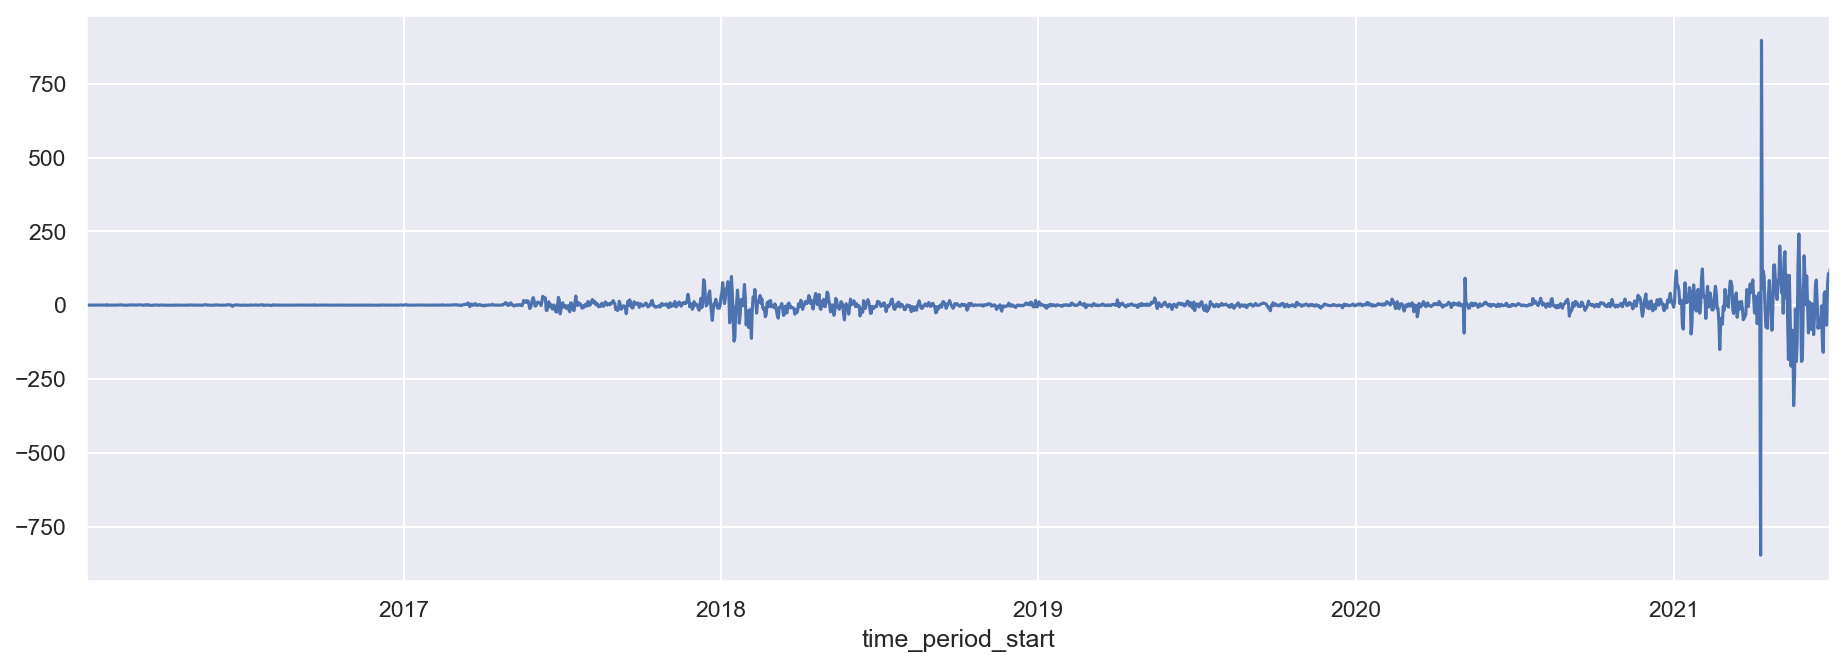

In [227]:
plt.figure(figsize=(15,5),dpi=150)
df['avg_rate'].diff(1).dropna().plot()

In [237]:
df["weekday"] = df.index.dayofweek

In [238]:
df["weekday"] = df["weekday"].apply(number_to_day)

(0.0, 500.0)

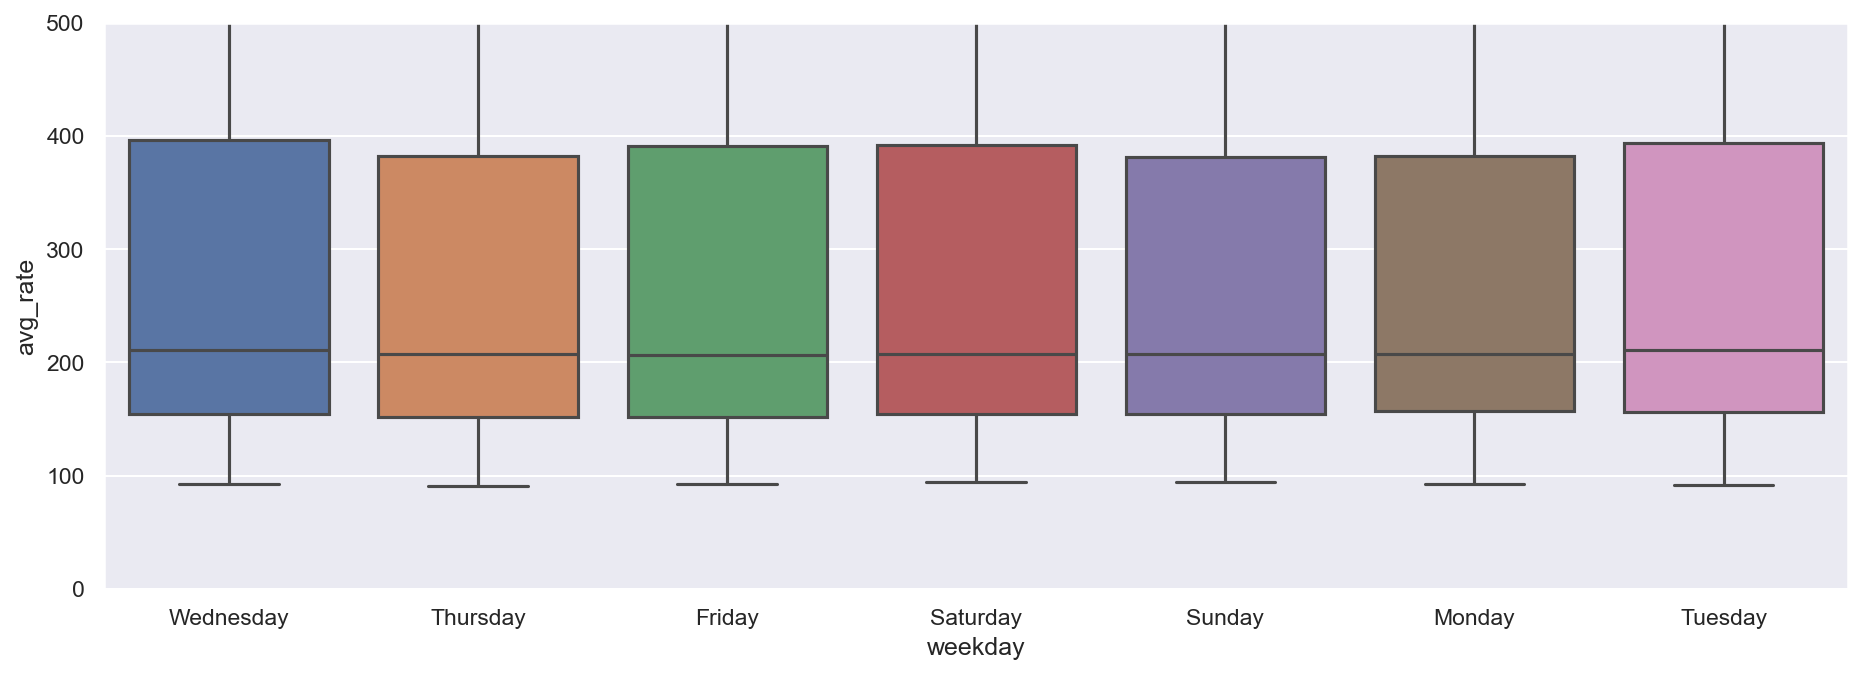

In [254]:
plt.figure(figsize=(15,5), dpi=150)
sns.boxplot(data=df[df.index>'2019-01-01'], y='avg_rate', x='weekday')
plt.ylim(0,500)

In [230]:
df

,rate_open,rate_high,rate_low,rate_close,avg_rate
time_period_start,,,,,
2016-01-01,0.891758,0.915913,0.834592,0.875048,0.883403
2016-01-02,0.875986,0.904742,0.861439,0.874035,0.875010
2016-01-03,0.875076,0.903713,0.870055,0.873491,0.874284
2016-01-04,0.874000,0.902119,0.868635,0.879264,0.876632
2016-01-05,0.881957,0.917123,0.866040,0.876195,0.879076
...,...,...,...,...,...
2021-06-26,1518.983163,1560.962009,1439.590934,1534.355268,1526.669216
2021-06-27,1535.680038,1669.372300,1511.100866,1657.174974,1596.427506
2021-06-28,1661.600864,1803.932244,1640.965855,1744.771458,1703.186161


In [223]:
result = adfuller(df['avg_rate'].diff(1).dropna())
print('Test statistic = {:.3f}'.format(result[0]))
print('P-value = {:.3f}'.format(result[1]))
print('Critical values :')
for k, v in result[4].items():
    print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<result[0] else '', 100-int(k[:-1])))

Test statistic = -9.084
P-value = 0.000
Critical values :
	1%: -3.4336552971929506 - The data is  stationary with 99% confidence
	5%: -2.8630000946528655 - The data is  stationary with 95% confidence
	10%: -2.5675472932714394 - The data is  stationary with 90% confidence


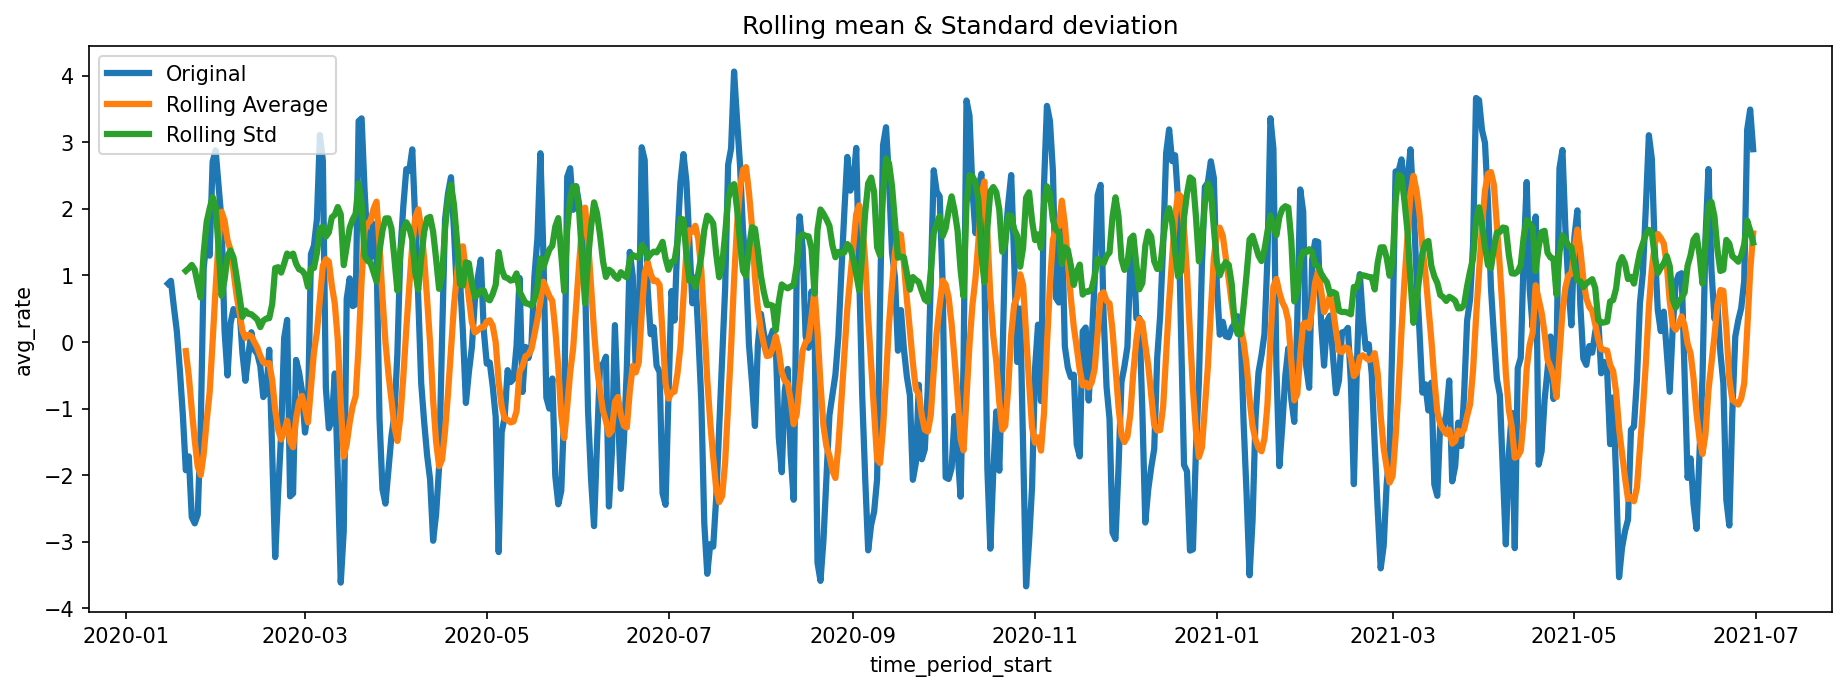

Test statistic = -8.384
P-value = 0.000
Critical values :
	1%: -3.443161545965353 - The data is  stationary with 99% confidence
	5%: -2.8671904981615706 - The data is  stationary with 95% confidence
	10%: -2.5697795041589244 - The data is  stationary with 90% confidence


In [154]:
w = 7
df_detrend = (df[['avg_rate']] - df[['avg_rate']].rolling(window=w).mean())/df[['avg_rate']].rolling(window=w).std()
df_lag = df_detrend - df_detrend.shift(w)

get_stationarity(df=df_lag.dropna(), var_to_predict='avg_rate', window=w)

# Modeling

## Preprocessing

In [201]:
y = df['avg_rate']

In [203]:
y_train, y_test = train_test_split(y, test_size=0.1, shuffle=False)

In [204]:
predict_date = len(y) - len(y_train)

<AxesSubplot:xlabel='time_period_start', ylabel='avg_rate'>

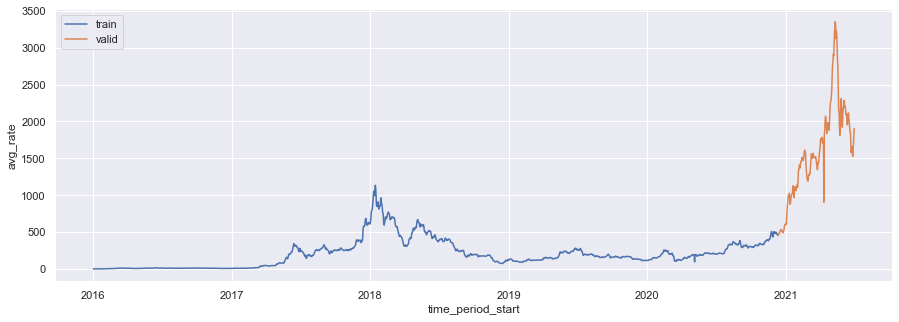

In [205]:
plt.figure(figsize=(15,5))
sns.lineplot(x=y_train.index, y=y_train, label='train')
sns.lineplot(x=y_test.index, y=y_test, label='valid')

### Baseline model

In [209]:
def ses(y, y_train,y_test,smoothing_level,predict_date):
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    fit1 = SimpleExpSmoothing(y_train).fit(smoothing_level=smoothing_level,optimized=False)
    fcast1 = fit1.forecast(predict_date).rename(r'$\alpha={}$'.format(smoothing_level))
    # specific smoothing level
    fcast1.plot(marker='o', color='blue', legend=True)
    fit1.fittedvalues.plot(marker='o',  color='blue')
    mse1 = ((fcast1 - y_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with smoothing level of {} is {}'.format(smoothing_level,round(np.sqrt(mse1), 2)))
    
    ## auto optimization
    fit2 = SimpleExpSmoothing(y_train).fit()
    fcast2 = fit2.forecast(predict_date).rename(r'$\alpha=%s$'%fit2.model.params['smoothing_level'])
    # plot
    fcast2.plot(marker='o', color='green', legend=True)
    fit2.fittedvalues.plot(marker='o', color='green')
    
    mse2 = ((fcast2 - y_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with auto optimization is {}'.format(round(np.sqrt(mse2), 2)))
    
    plt.show()

The Root Mean Squared Error of our forecasts with smoothing level of 0.8 is 1308.98
The Root Mean Squared Error of our forecasts with auto optimization is 1311.25


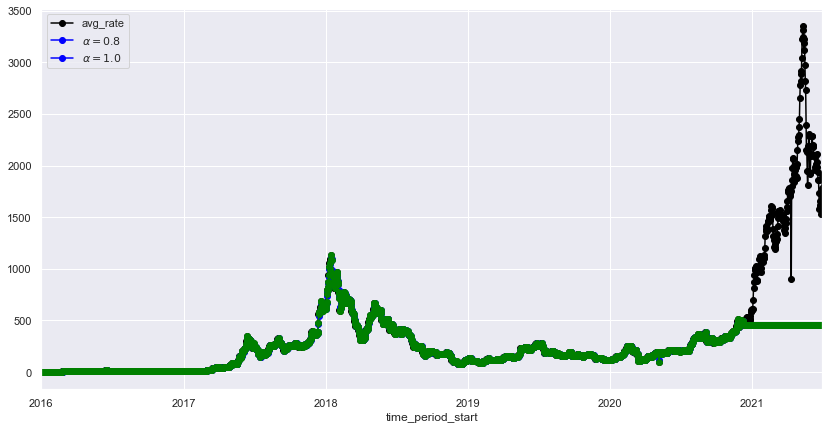

In [210]:
ses(y,y_train,y_test,0.8,predict_date)

In [211]:
def holt(y,y_train,y_test,smoothing_level,smoothing_slope, predict_date):
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    fit1 = Holt(y_train).fit(smoothing_level, smoothing_slope, optimized=False)
    fcast1 = fit1.forecast(predict_date).rename("Holt's linear trend")
    mse1 = ((fcast1 - y_test) ** 2).mean()
    print('The Root Mean Squared Error of Holt''s Linear trend {}'.format(round(np.sqrt(mse1), 2)))

    fit2 = Holt(y_train, exponential=True).fit(smoothing_level, smoothing_slope, optimized=False)
    fcast2 = fit2.forecast(predict_date).rename("Exponential trend")
    mse2 = ((fcast2 - y_test) ** 2).mean()
    print('The Root Mean Squared Error of Holt''s Exponential trend {}'.format(round(np.sqrt(mse2), 2)))
    
    fit1.fittedvalues.plot(marker="o", color='blue')
    fcast1.plot(color='blue', marker="o", legend=True)
    fit2.fittedvalues.plot(marker="o", color='red')
    fcast2.plot(color='red', marker="o", legend=True)

    plt.show()

The Root Mean Squared Error of Holts Linear trend 1775.61
The Root Mean Squared Error of Holts Exponential trend 1564.3


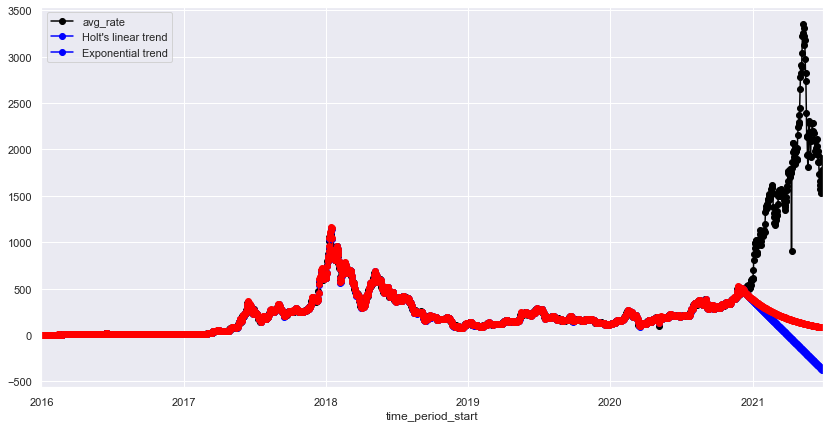

In [212]:
holt(y, y_train, y_test, 0.6,0.2,predict_date)

In [213]:
param_mini = 0

In [214]:
def sarima_grid_search(y,seasonal_period):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
    mini = float('+inf')
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                
                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal

                print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue
    print(f'The set of parameters with the minimum AIC is: SARIMA{param_mini}x{param_seasonal_mini} - AIC:{mini}')

In [19]:
# sarima_grid_search(y,7)

# Getting new data for LSTM

In [41]:
url = f'https://rest.coinapi.io/v1/exchangerate/ETH/EUR/history?period_id=1MIN&time_start=2021-05-01T00:00:00&time_end=2021-07-01T00:00:00&limit=100000'
response = requests.get(url, headers=headers)
coin_data = json.loads(response.text)
coin_data

{'error': 'Too many requests - You have exceeded your API key last 24 hour requests executed limit, please wait for new requests or contact support for upgrading your existing plan or enabling overage.',
 'faq_0': 'Q: How requests are calculated? A: The request is a single API call to our REST API without `limit` parameter. Or with `limit` parameter, the request is counted every 100 data points returned by the API.',
 'faq_1': 'Q: How I can monitor number of requests left? A: Every authenticated API call providing information about the current state of the limits in the HTTP response headers, more info here: https://docs.coinapi.io/#request-limits',
 'faq_2': "Q: I'm on Professional plan. How I can have more requests? A: Please contact support at the https://www.coinapi.io/support for more information.",
 'faq_3': "Q: I'm on free plan and I didn't executed 100 requests yet and got 429 error. A: Free plan contains additional limitations to prevent fraud and usage of the multiple free AP

In [38]:
# NEW KEY
api_key = "CDE27277-87DA-4A9B-9C24-6BEDCE2FA1B3" # "AE8341BE-EF85-469B-9FDE-4315C9BF01F6"
cryptos = ['BTC', 'ETH', 'LTC']
os.makedirs('Data', exist_ok=True)
headers = {'X-CoinAPI-Key' : api_key}

for crypto in cryptos :
    url = f'https://rest.coinapi.io/v1/exchangerate/{crypto}/EUR/history?period_id=1MIN&time_start=2021-05-01T00:00:00&time_end=2021-07-01T00:00:00&limit=100000'
    response = requests.get(url, headers=headers)
    coin_data  = json.loads(response.text)
    df = pd.DataFrame(coin_data)
    df = df.drop(['time_period_end', 'time_open', 'time_close'], axis=1)
    df['time_period_start'] = df['time_period_start'].astype('datetime64[m]')
    df.to_csv(f"Data/{crypto} Min History.csv", index = False)

ValueError: If using all scalar values, you must pass an index

# CONTINUE HERE - LOAD LTC

In [16]:
api_key = "CDE27277-87DA-4A9B-9C24-6BEDCE2FA1B3" # "AE8341BE-EF85-469B-9FDE-4315C9BF01F6"

In [17]:
crypto = 'LTC'

In [18]:
url = f'https://rest.coinapi.io/v1/exchangerate/{crypto}/EUR/history?period_id=1MIN&time_start=2021-05-01T00:00:00&time_end=2021-07-01T00:00:00&limit=100000'
response = requests.get(url, headers=headers)
coin_data  = json.loads(response.text)
df = pd.DataFrame(coin_data)
df = df.drop(['time_period_end', 'time_open', 'time_close'], axis=1)
df['time_period_start'] = df['time_period_start'].astype('datetime64[m]')
df.to_csv(f"Data/{crypto} Min History.csv", index = False)

ValueError: If using all scalar values, you must pass an index

In [19]:
cryptos = ['BTC', 'ETH']
from zipfile import ZipFile
# Create a ZipFile Object
with ZipFile('Data/Crypto_MIN.zip', 'w') as zipObj:
    for crypto in cryptos : 
        # Add multiple files to the zip
        try: zipObj.write(f'Data/{crypto} Min History.csv')
        except: continue

## With the new key

In [2]:
# NEW KEY
api_key = "AE8341BE-EF85-469B-9FDE-4315C9BF01F6" # "CDE27277-87DA-4A9B-9C24-6BEDCE2FA1B3"
# cryptos = ['BTC', 'ETH', 'LTC']
os.makedirs('Data', exist_ok=True)
headers = {'X-CoinAPI-Key' : api_key}

crypto = 'LTC'
url = f'https://rest.coinapi.io/v1/exchangerate/{crypto}/EUR/history?period_id=1MIN&time_start=2021-05-01T00:00:00&time_end=2021-07-01T00:00:00&limit=100000'
response = requests.get(url, headers=headers)
coin_data  = json.loads(response.text)
df = pd.DataFrame(coin_data)
df = df.drop(['time_period_end', 'time_open', 'time_close'], axis=1)
df['time_period_start'] = df['time_period_start'].astype('datetime64[m]')
df.to_csv(f"Data/{crypto} Min History.csv", index = False)

In [6]:
right_time = pd.read_csv('Data/ETH Min History.csv')['time_period_start'].astype('datetime64[m]')

In [9]:
df = pd.read_csv('Data/BTC Min History.csv')
df['time_period_start'] = right_time

In [11]:
df.to_csv("Data/BTC Min History.csv", index = False)